In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
df = pd.read_csv('medical_examination.csv')

In [185]:
df['overweight'] = np.where(df['weight']/((df['height']/100)**2) > 25, 1, 0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [186]:
df['cholesterol'] = np.where(df['cholesterol']>1,1,0)

In [187]:
df['gluc'] = np.where(df['gluc']>1,1,0)

In [195]:
df_cat = pd.melt(df, id_vars = "cardio", value_vars = ["active", "alco", "cholesterol", "gluc", "overweight", "smoke"])

In [208]:
#sns.catplot(data=df_cat, col= 'cardio', x ='variable', hue= 'value', kind='count').set_axis_labels('count','Total')

In [198]:
df_cat['total'] = 1
df_cat= df_cat.groupby(['cardio', 'variable', 'value'],as_index= False).count()


In [199]:
df_cat.head()

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


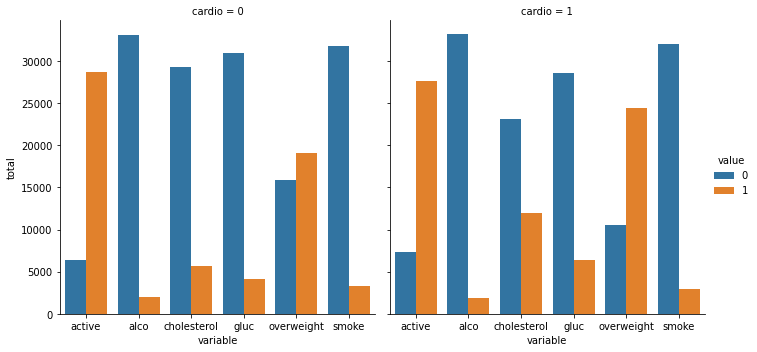

In [200]:
sns.catplot(x='variable', y='total' ,data=df_cat, kind='bar', hue= 'value',col = 'cardio' )

In [117]:
df_heat= df[(df['ap_lo'] <= df['ap_hi']) & 
            (df['height'] >= df['height'].quantile(0.025)) &
            (df['height'] <= df['height'].quantile(0.975)) &
            (df['weight'] >= df['weight'].quantile(0.025)) &
            (df['weight'] <= df['weight'].quantile(0.975))
           ]

In [201]:
corr = df_heat.corr()

In [202]:
mask = np.triu(corr)

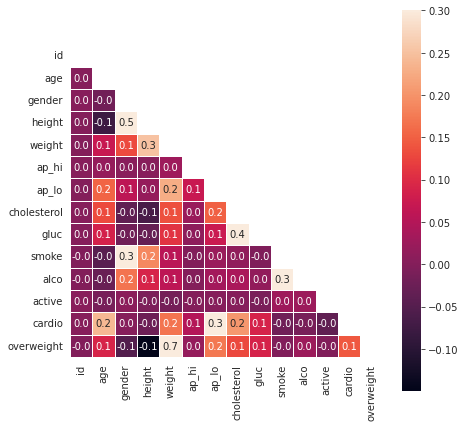

In [203]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 7))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot = True, fmt = ".1f", linewidths=.5)